<h2> Parte 2: Prueba Técnica para Ingeniero de datos</h2>
<h3> By: Sergio Andres Rios Gomez</h3>

In [1]:
# Importando librerias. 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.image as mpimg

<p> Cargue de datos crudos al Notebook</p>

In [2]:
# Cargar archivos con data cruda (Planteamiento inicial)
# Modificar "ruta_data" al descargar el archivo en equpo local
ruta_data = "C:\\Users\\chech\\PC Febrero 2023\\" # <-- Modificar Ruta según la ubicación del proyecto en tú equipo

proyecto = "Proyecto_IngenieroDatos\\data\\"

ruta_obligaciones = os.path.join(ruta_data,proyecto, "obligaciones_clientes.xlsx")
ruta_tasas = os.path.join(ruta_data,proyecto, "tasas_productos.xlsx")

df_obligaciones = pd.read_excel(ruta_obligaciones, sheet_name="Obligaciones_clientes")
df_tasas = pd.read_excel(ruta_tasas, sheet_name="Tasas")

<h4> 1. Se requiere tomar las obligaciones de cada cliente y agregar la tasa correspondiente al producto asignado </h4>

<p> Trasformación del dataset tasas </p>

In [3]:
largo_df = len(df_tasas)
productos = list(df_tasas.columns[4:])
cant_productos = len(productos)
# Crear un nuevo DataFrame con las columnas especificadas
tasas = df_tasas[['cod_segmento', 'cod_subsegmento', 'calificacion_riesgos']]

In [4]:
largo_df = len(df_tasas)
productos = list(df_tasas.columns[4:])  # Lista de productos a partir de las columnas 4 en adelante
cant_productos = len(productos)

# Crear una lista que contenga cada producto repetido 'largo_df' veces
lista_productos = []
for producto in productos:
    lista_productos.extend([producto] * largo_df)

# Crear un DataFrame replicando las filas de 'df_tasas' tantas veces como productos haya
tasas_p = pd.concat([df_tasas[['cod_segmento', 'cod_subsegmento', 'calificacion_riesgos']]] * cant_productos, ignore_index=True)

# Añadir la nueva columna 'productos' al DataFrame expandido
tasas_p['productos'] = lista_productos

In [5]:
# Función para obtener el valor de la tasa. 
def obtener_valor_tasa(row):
    producto = row['productos']
    # Verificar si existe la columna con el nombre del producto
    if producto in df_tasas.columns:
        return row[producto]  # Buscar el valor en la columna correspondiente
    else:
        return None

In [6]:
# Verifica los valores de las columnas 'productos' y 'df_tasas' antes del merge
print("Valores únicos en tasas['productos']: ", tasas_p['productos'].unique())
print("Columnas en df_tasas: ", df_tasas.columns)

# Realizar el merge de ambos DataFrames
merged_df = pd.merge(tasas_p, df_tasas, on=['cod_segmento', 'cod_subsegmento', 'calificacion_riesgos'], how='left')

# Definir la lógica de obtención del valor de la tasa
def obtener_valor_tasa(row):
    producto = row['productos']
    if producto == 'tasa_cartera':
        return row['tasa_cartera']
    elif producto == 'tasa_operacion_especifica':
        return row['tasa_operacion_especifica']
    elif producto == 'tasa_hipotecario':
        return row['tasa_hipotecario']
    elif producto == 'tasa_leasing':
        return row['tasa_leasing']
    elif producto == 'tasa_sufi':
        return row['tasa_sufi']
    elif producto == 'tasa_factoring':
        return row['tasa_factoring']
    elif producto == 'tasa_tarjeta':
        return row['tasa_tarjeta']
    else:
        return None

# Aplicar la función para llenar la nueva columna 'valor_tasa'
merged_df['valor_tasa'] = merged_df.apply(obtener_valor_tasa, axis=1)
tasas_p = merged_df[['cod_segmento', 'cod_subsegmento', 'calificacion_riesgos', 'productos', 'valor_tasa']]

Valores únicos en tasas['productos']:  ['tasa_cartera' 'tasa_operacion_especifica' 'tasa_hipotecario'
 'tasa_leasing' 'tasa_sufi' 'tasa_factoring' 'tasa_tarjeta']
Columnas en df_tasas:  Index(['cod_segmento', 'segmento', 'cod_subsegmento', 'calificacion_riesgos',
       'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
       'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta'],
      dtype='object')


<p> Solución del punto 1, agregando la columna tasa a cada obligación.</p>

In [7]:
# Realizar el merge entre df_obligaciones y tasas_p, uniendo por las 4 columnas clave
df_obligaciones = pd.merge(
    df_obligaciones,
    tasas_p[['cod_segmento', 'cod_subsegmento', 'calificacion_riesgos', 'productos', 'valor_tasa']],  # Seleccionamos solo las columnas necesarias
    on=['cod_segmento', 'cod_subsegmento', 'calificacion_riesgos', 'productos'],  # Claves de unión
    how='left'  # Para mantener todas las filas de df_obligaciones
)

# Renombrar la columna 'valor_tasa' a 'tasa' en df_obligaciones
df_obligaciones.rename(columns={'valor_tasa': 'tasa'}, inplace=True)

In [8]:
df_obligaciones.head()

,radicado,num_documento,cod_segmento,cod_subsegmento,calificacion_riesgos,id_producto,productos,id_nombre_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,cod_periodicidad,periodicidad,saldo_deuda,modalidad,tipo_plazo,tasa
0,14427616700,50034064,5,2,C8,0000000000714922919 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,55170.0,1994-10-31,398,1,MENSUAL,376.5,Actual,CP,0.386700
1,14427616700,50034064,5,2,C8,0000000000200001114 - 29-Cartera Total,tasa_cartera,2,Obligacion - producto,22500.0,1997-08-02,353,1,MENSUAL,0.0,Actual,CP,0.210082
2,14426549017,996040778,2,-1,R3,0000000000904140027 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,7500.0,1997-11-11,360,1,MENSUAL,0.0,Actual,CP,0.386700
3,14426549017,996040778,2,-1,R3,0000000000494491979 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,7500.0,1997-11-11,360,1,MENSUAL,0.0,Actual,CP,0.386700
4,14426549017,996040778,2,-1,R3,0000000000077017204 - 29-Cartera Total,tasa_cartera,2,Obligacion - producto,52500.0,1998-09-16,291,1,MENSUAL,0.0,Actual,CP,0.134635


<h4> 2. Se debe convertir la tasa a una tasa efectiva  </h4>

<p> Función para calcular tasa efectiva y agregar la columna al df df_obligaciones </p>

In [9]:
def calcular_tasa_efectiva(tasa, cod_periodicidad):
    return np.power(1 + (tasa / cod_periodicidad), cod_periodicidad) - 1

In [10]:
# Aplicar la función a cada fila del DataFrame para crear la nueva columna 'tasa_efectiva'
df_obligaciones['tasa_efectiva'] = df_obligaciones.apply(
    lambda row: calcular_tasa_efectiva(row['tasa'], row['cod_periodicidad']), axis=1
)

In [11]:
df_obligaciones.head(3)

,radicado,num_documento,cod_segmento,cod_subsegmento,calificacion_riesgos,id_producto,productos,id_nombre_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,cod_periodicidad,periodicidad,saldo_deuda,modalidad,tipo_plazo,tasa,tasa_efectiva
0,14427616700,50034064,5,2,C8,0000000000714922919 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,55170.0,1994-10-31,398,1,MENSUAL,376.5,Actual,CP,0.386700,0.386700
1,14427616700,50034064,5,2,C8,0000000000200001114 - 29-Cartera Total,tasa_cartera,2,Obligacion - producto,22500.0,1997-08-02,353,1,MENSUAL,0.0,Actual,CP,0.210082,0.210082
2,14426549017,996040778,2,-1,R3,0000000000904140027 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,7500.0,1997-11-11,360,1,MENSUAL,0.0,Actual,CP,0.386700,0.386700


<h4> 3. Tomar la tasa efectiva, multiplicarla por el valor_inicial y dejar este resultado como valor_final, el resultado de esta tabla debe quedar almacenado. </h4>

<p> Función para calcular y luego aplicar en el dataframe tasa_efectiva * valor_inicial </p>

In [12]:
# Definir la función para calcular el valor final
def calcular_valor_final(tasa_efectiva, valor_inicial):
    return tasa_efectiva * valor_inicial

In [13]:
# Aplicar la función a cada fila del DataFrame para crear la nueva columna 'valor_final'
df_obligaciones['valor_final'] = df_obligaciones.apply(
    lambda row: calcular_valor_final(row['tasa_efectiva'], row['valor_inicial']), axis=1
)

In [14]:
df_obligaciones.head(3)

,radicado,num_documento,cod_segmento,cod_subsegmento,calificacion_riesgos,id_producto,productos,id_nombre_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,cod_periodicidad,periodicidad,saldo_deuda,modalidad,tipo_plazo,tasa,tasa_efectiva,valor_final
0,14427616700,50034064,5,2,C8,0000000000714922919 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,55170.0,1994-10-31,398,1,MENSUAL,376.5,Actual,CP,0.386700,0.386700,21334.239000
1,14427616700,50034064,5,2,C8,0000000000200001114 - 29-Cartera Total,tasa_cartera,2,Obligacion - producto,22500.0,1997-08-02,353,1,MENSUAL,0.0,Actual,CP,0.210082,0.210082,4726.844059
2,14426549017,996040778,2,-1,R3,0000000000904140027 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,7500.0,1997-11-11,360,1,MENSUAL,0.0,Actual,CP,0.386700,0.386700,2900.250000


<h4> 4. Se necesita sumar el valor_final de todas las obligaciones por cliente y dejar únicamente las que tenga una cantidad de productos mayor o igual a 2, el resultado de esta tabla debe quedar almacenado. </h4>

In [15]:
# Agrupar por 'num_documento', sumar el 'valor_final' y contar los productos
resultado = df_obligaciones.groupby('num_documento').agg(
    total_valor_final=('valor_final', 'sum'),
    num_productos=('num_documento', 'count')
).reset_index()

# Filtrar los clientes que tienen más de 1 producto (mayor o igual a 2)
consolidado_oblig = resultado[resultado['num_productos'] >= 2]

In [16]:
consolidado_oblig.head()

,num_documento,total_valor_final,num_productos
0,3907738,70005.371681,10
1,4234923,137331.513438,8
3,4935132,185517.157088,8
4,7061608,181222.523610,5
5,7099543,133371.023142,6


<h2> *** EDA dataframe completo df_obligaciones ***</h2>

<h3> Analisis valores numericos. </h3>
<li> La distribución de la tasa efectiva tiene un pico alrededor de 20%, la mayoría de las tasas efectivas se concentran en este rango. Las tasas efectivas que van desde cerca de 0 hasta alrededor de 0.40. Esto indica que hay una variabilidad significativa en las tasas aplicadas.</li>
<li> Boxplot de valor_inicial: Se observan varios valores iniciales extremadamente altos en comparación con el resto de los datos. La mayoría de los valores son relativamente bajos, pero hay unos pocos valores muy altos que afectan la media.</li>
<li> Boxplot de tasa_efectiva: TE tiene una distribución más simétrica en comparación con el valor inicial. El rango de las tasas efectivas es más estrecho</li>

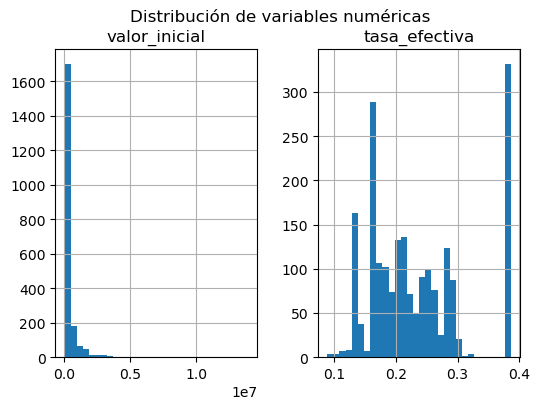

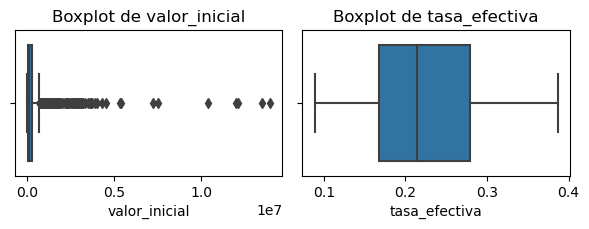

In [17]:
# Columnas numéricas a analizar
columnas_numericas = ['valor_inicial', 'tasa_efectiva']

# Histograma para cada variable numérica
df_obligaciones[columnas_numericas].hist(bins=30, figsize=(6,4))
plt.suptitle("Distribución de variables numéricas")
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(6,4))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_obligaciones[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

<h3> Variables categóricas </h3>
<li> Dominancia de la tasa_cartera: La tasa de cartera es el producto más frecuente, con un número significativamente mayor de registros en comparación con los otros productos.</li>
<li> Baja frecuencia de otros productos: Los demás productos (tasa_operacion_especifica, tasa_leasing, tasa_factoring, tasa_hipotecario, tasa_sufi) presentan una frecuencia mucho menor. Esto indica que estos productos son menos comunes o tienen un menor volumen de transacciones. </li>
<li> Modalidad "Actual": Es la más frecuente, esto podría indicar que existe una base de clientes o productos establecida que se mantiene en la modalidad actual. </li>
<li> Los productos a corto plazo tienen mayor cantidad, con respecto a los productos de largo plazo. </li>

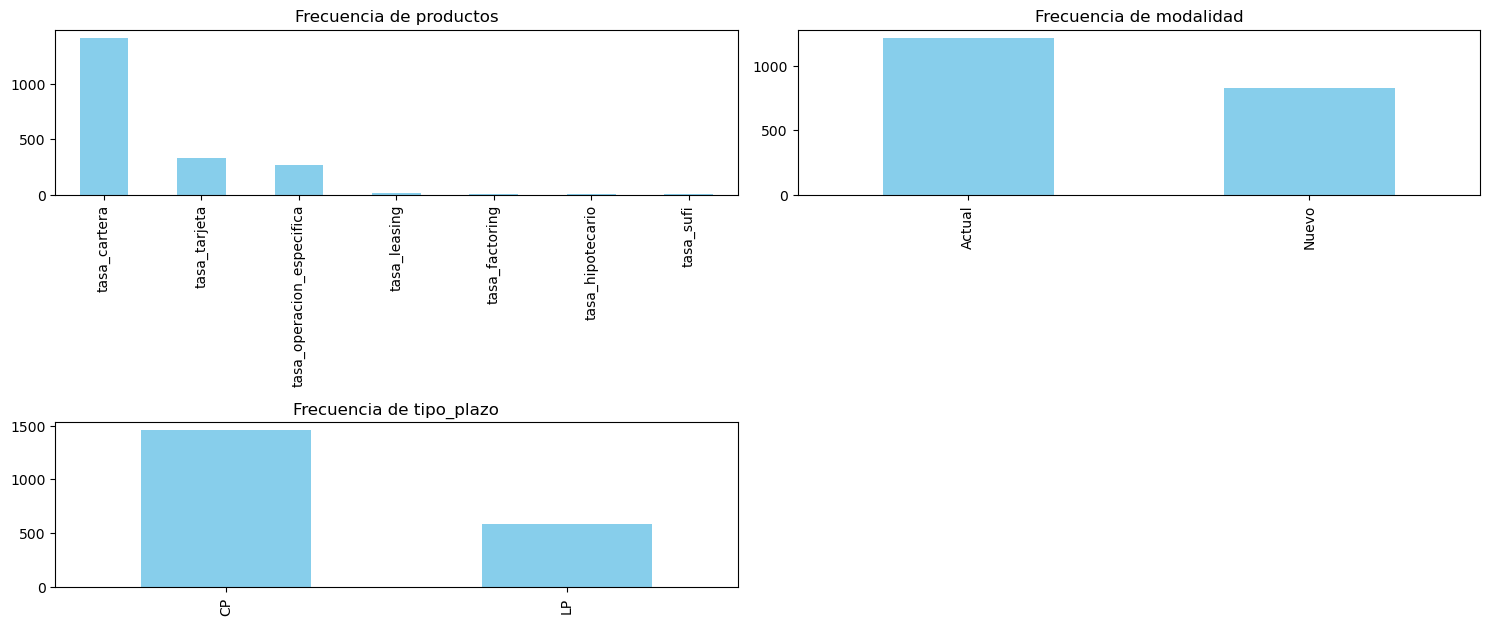

In [18]:
# 
columnas_categoricas = ['productos', 'modalidad', 'tipo_plazo']

# Gráficos de barras para las variables categóricas
plt.figure(figsize=(15,10))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(3, 2, i)
    df_obligaciones[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Frecuencia de {col}")
plt.tight_layout()
plt.show()

<h4> Analisis correlaciones valores numericos.  </h4>
<p> La siguiente grafica nos permite confirmar corelaciones lineales entre variables, para nuestro caso se confirmn hipotesis de comportamientos como: Alta correlación positiva entre valor_inicial y valor_final, alta correlación positiva entre valor_inicial y saldo_deuda, correlación negativa entre tasa y valor_final. La tasa y tasa efectiva tienen una relación lineal perfecta (1) lo que nos piede confirmar el calculo de TE  </p> 

In [19]:
df_obligaciones.head(3)

,radicado,num_documento,cod_segmento,cod_subsegmento,calificacion_riesgos,id_producto,productos,id_nombre_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,cod_periodicidad,periodicidad,saldo_deuda,modalidad,tipo_plazo,tasa,tasa_efectiva,valor_final
0,14427616700,50034064,5,2,C8,0000000000714922919 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,55170.0,1994-10-31,398,1,MENSUAL,376.5,Actual,CP,0.386700,0.386700,21334.239000
1,14427616700,50034064,5,2,C8,0000000000200001114 - 29-Cartera Total,tasa_cartera,2,Obligacion - producto,22500.0,1997-08-02,353,1,MENSUAL,0.0,Actual,CP,0.210082,0.210082,4726.844059
2,14426549017,996040778,2,-1,R3,0000000000904140027 - 49-Tarjeta de Credito,tasa_tarjeta,4,Obligacion - producto,7500.0,1997-11-11,360,1,MENSUAL,0.0,Actual,CP,0.386700,0.386700,2900.250000


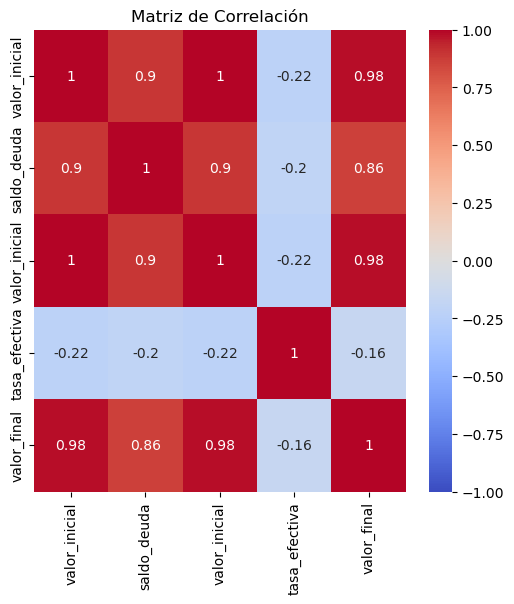

In [20]:
columnas_num = ['valor_inicial', 'saldo_deuda','valor_inicial', 'tasa_efectiva', 'valor_final']

# Correlación entre variables numéricas
plt.figure(figsize=(6,6))
sns.heatmap(df_obligaciones[columnas_num].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


<h3> Analisis temporal </h3>
<li> El grafico temporal, en terminos de cantidad desembolsos y valores iniciales, muestran un crecimiento muy importante en los ultimos 5 años</li>
<li> Durante un período prolongado, desde 1995 hasta aproximadamente 2015, el valor inicial se mantuvo relativamente estable y bajo </li>

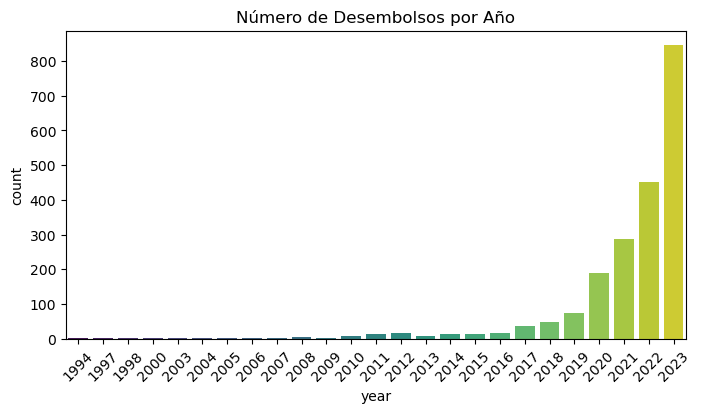

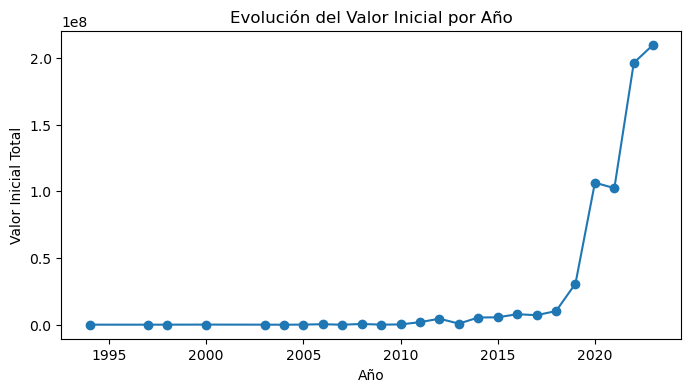

In [21]:
df_obligaciones['fecha_desembolso'] = pd.to_datetime(df_obligaciones['fecha_desembolso'])

# Crear una columna de año y mes para el análisis temporal
df_obligaciones['year'] = df_obligaciones['fecha_desembolso'].dt.year
df_obligaciones['month'] = df_obligaciones['fecha_desembolso'].dt.month

# Distribución de desembolsos por año
plt.figure(figsize=(8,4))
sns.countplot(x='year', data=df_obligaciones, palette='viridis')
plt.title('Número de Desembolsos por Año')
plt.xticks(rotation=45)
plt.show()

# Evolución de valor_inicial por año
plt.figure(figsize=(8,4))
df_obligaciones.groupby('year')['valor_inicial'].sum().plot(marker='o')
plt.title('Evolución del Valor Inicial por Año')
plt.ylabel('Valor Inicial Total')
plt.xlabel('Año')
plt.show()

<h4> analisi desembolsos por segmento: </h4>
<p> Segmentos: 2: Empresarial // 5:Pyme // 9: Negocios e independientes</p>
<li> El segmento Pyme tiene significativamente más desembolsos que los otros dos segmentos. Esto sugiere que el segmento 5 podría ser el más activo o el más grande en términos de volumen de negocios.</li>
<li> Los segmentos 2 y 5 tienen valores muy altos, con lo que podemos inferir que los las ogligaciones financieras analizadas tienen un enfoque muy alto en entidades empresariales y pymes.</li>

In [22]:
df_obligaciones.groupby('cod_segmento')['valor_inicial'].describe()

,count,mean,std,min,25%,50%,75%,max
cod_segmento,,,,,,,,
2,314.0,692072.793912,1.331808e+06,58.5000,108381.76125,300000.0,750000.0,13455594.0
5,1645.0,285561.433775,7.005477e+05,34.5300,31200.00000,97884.0,300000.0,13950000.0
9,89.0,49436.926736,6.174306e+04,831.8685,10500.00000,30000.0,60000.0,450000.0
